# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Brian Sangapta]
- **Email:** [briansangapta@gmail.com]
- **ID Dicoding:** [z0zero]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan) dan faktor cuaca, serta bagaimana hal ini dapat membantu optimalisasi ketersediaan sepeda?
- Pertanyaan 2: Apa faktor-faktor yang paling mempengaruhi jumlah peminjaman sepeda dan bagaimana korelasi antara faktor-faktor tersebut dengan tingkat permintaan?


## Import Semua Packages/Library yang Digunakan

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistical analysis
from scipy import stats

# Date handling
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling
##### Unggah dataset ke Google Colab:

In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [3]:
import zipfile
import os

# Buat direktori ./data jika belum ada
os.makedirs('./data', exist_ok=True)

# Ekstrak file archive.zip ke direktori ./data
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

### Gathering Data

##### Membaca kedua file CSV

In [3]:
df_day = pd.read_csv('./data/day.csv')
df_hour = pd.read_csv('./data/hour.csv')

##### Menampilkan informasi dasar kedua dataset

In [4]:
# Menampilkan Informasi Dataset Harian
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Sample 5 baris pertama dataset harian
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Menampilkan Informasi Dataset Per Jam
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Sample 5 baris pertama dataset per jam
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Memeriksa missing values

In [8]:
# Memeriksa Missing Values dalam Dataset Harian
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Memeriksa Missing Values dalam Dataset Per Jam
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight dari Gathering Data:**
- Dataset terbagi menjadi data harian (731 baris) dan per jam (17,379 baris) dengan kualitas data yang baik (tidak ada missing values)
- Fitur target adalah total peminjaman sepeda ('cnt') yang terbagi menjadi pengguna kasual dan terdaftar
- Tersedia berbagai fitur temporal (tahun, bulan, hari, jam) dan kondisional (cuaca, suhu, kelembaban, angin) untuk analisis mendalam
- Data mencakup periode 2 tahun (2011-2012) dengan granularitas hingga level per jam
- Semua fitur numerik sudah terisi lengkap dengan tipe data yang konsisten (int64, float64) dan 1 kolom tanggal (object)

### Assessing Data

#### 1. Analisis Dataset Harian

In [10]:
# ANALISIS DATASET HARIAN - Statistik Deskriptif
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# ANALISIS DATASET HARIAN - Tipe Data
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
# ANALISIS DATASET HARIAN - Nilai Unik per Kolom
for column in df_day.columns:
    unique_values = df_day[column].unique()
    display(pd.DataFrame({column: unique_values[:5]}))
    print("...")

,instant
0,1
1,2
2,3
3,4
4,5


...


,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


...


,season
0,1
1,2
2,3
3,4


...


,yr
0,0
1,1


...


,mnth
0,1
1,2
2,3
3,4
4,5


...


,holiday
0,0
1,1


...


,weekday
0,6
1,0
2,1
3,2
4,3


...


,workingday
0,0
1,1


...


,weathersit
0,2
1,1
2,3


...


,temp
0,0.344167
1,0.363478
2,0.196364
3,0.200000
4,0.226957


...


,atemp
0,0.363625
1,0.353739
2,0.189405
3,0.212122
4,0.229270


...


,hum
0,0.805833
1,0.696087
2,0.437273
3,0.590435
4,0.436957


...


,windspeed
0,0.160446
1,0.248539
2,0.248309
3,0.160296
4,0.186900


...


,casual
0,331
1,131
2,120
3,108
4,82


...


,registered
0,654
1,670
2,1229
3,1454
4,1518


...


,cnt
0,985
1,801
2,1349
3,1562
4,1600


...


#### 2. Analisis Dataset Per Jam

In [13]:
# ANALISIS DATASET PER JAM - Statistik Deskriptif
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
# ANALISIS DATASET PER JAM - Tipe Data
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [15]:
# ANALISIS DATASET PER JAM - Nilai Unik per Kolom
for column in df_hour.columns:
    unique_values = df_hour[column].unique()
    display(pd.DataFrame({column: unique_values[:5]}))
    print("...")

,instant
0,1
1,2
2,3
3,4
4,5


...


,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


...


,season
0,1
1,2
2,3
3,4


...


,yr
0,0
1,1


...


,mnth
0,1
1,2
2,3
3,4
4,5


...


,hr
0,0
1,1
2,2
3,3
4,4


...


,holiday
0,0
1,1


...


,weekday
0,6
1,0
2,1
3,2
4,3


...


,workingday
0,0
1,1


...


,weathersit
0,1
1,2
2,3
3,4


...


,temp
0,0.24
1,0.22
2,0.20
3,0.32
4,0.38


...


,atemp
0,0.2879
1,0.2727
2,0.2576
3,0.3485
4,0.3939


...


,hum
0,0.81
1,0.80
2,0.75
3,0.86
4,0.76


...


,windspeed
0,0.0000
1,0.0896
2,0.2537
3,0.2836
4,0.2985


...


,casual
0,3
1,8
2,5
3,0
4,2


...


,registered
0,13
1,32
2,27
3,10
4,1


...


,cnt
0,16
1,40
2,32
3,13
4,1


...


#### 3. Matriks Korelasi untuk Dataset Harian

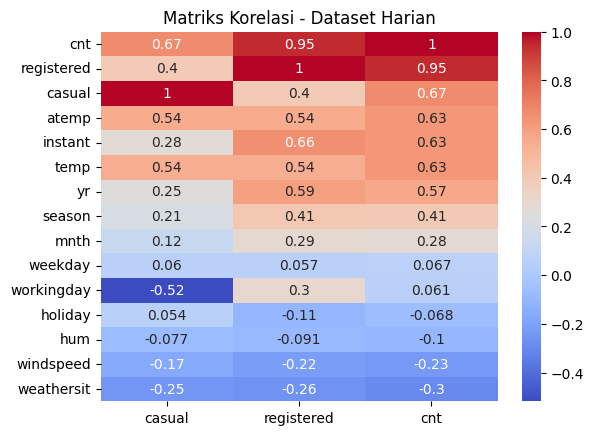

In [16]:
# MATRIKS KORELASI - DATASET HARIAN
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_day.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix[['casual', 'registered', 'cnt']].sort_values(by='cnt', ascending=False), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi - Dataset Harian')
plt.show()

**Insight dari Assessing Data:**
- Pola Penggunaan:
  * Rata-rata peminjaman harian: 4,504 sepeda (848 casual, 3,656 registered)
  * Rata-rata peminjaman per jam: 189 sepeda (36 casual, 154 registered)
  * Pengguna terdaftar (registered) mendominasi 81% dari total peminjaman

- Korelasi Kuat (berdasarkan total peminjaman/cnt):
  * Registered users (0.945): Kontributor utama total peminjaman
  * Casual users (0.672): Memiliki korelasi moderat
  * Suhu (temp/atemp ~0.63): Faktor cuaca yang paling berpengaruh
  * Tahun (0.566): Menunjukkan trend peningkatan penggunaan

- Korelasi Negatif:
  * Cuaca buruk (-0.297): Menurunkan jumlah peminjaman
  * Kecepatan angin (-0.234): Sedikit mengurangi peminjaman
  * Kelembaban (-0.100): Pengaruh minimal terhadap peminjaman

- Distribusi Data:
  * Weathersit: Mayoritas cuaca baik (1-2), jarang cuaca buruk (3-4)
  * Workingday: 68% hari kerja
  * Holiday: Hanya 2.8% hari adalah hari libur

### Cleaning Data

#### 1. Definisi Fungsi Pembersihan Data

In [17]:
# Function untuk mengubah format tanggal
def clean_datetime(df):
    df['dteday'] = pd.to_datetime(df['dteday'])
    return df

In [18]:
# Function untuk mapping nilai kategorikal
def map_categories(df):
    # Mapping untuk season
    season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    df['season'] = df['season'].map(season_map)

    # Mapping untuk weathersit
    weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
    df['weathersit'] = df['weathersit'].map(weather_map)

    # Mapping untuk yr
    df['yr'] = df['yr'].map({0: 2011, 1: 2012})

    return df

In [19]:
# Function untuk denormalisasi nilai numerik
def denormalize_temp(df):
    # Denormalisasi suhu (temp dan atemp)
    df['temp'] = df['temp'] * 41  # T(°C) = t * (max - min) + min = t * 41 + (-8) = t * 41 - 8
    df['temp'] = df['temp'] - 8
    df['atemp'] = df['atemp'] * 50  # T(°C) = t * (max - min) + min = t * 50 + (-16) = t * 50 - 16
    df['atemp'] = df['atemp'] - 16

    # Denormalisasi humidity
    df['hum'] = df['hum'] * 100

    # Denormalisasi windspeed
    df['windspeed'] = df['windspeed'] * 67

    return df

#### 2. Membersihkan Data Harian

In [20]:
# Membersihkan data harian
df_day_clean = df_day.copy()
df_day_clean = clean_datetime(df_day_clean)
df_day_clean = map_categories(df_day_clean)
df_day_clean = denormalize_temp(df_day_clean)

#### 3. Membersihkan Data Per Jam

In [21]:
# Membersihkan data per jam
df_hour_clean = df_hour.copy()
df_hour_clean = clean_datetime(df_hour_clean)
df_hour_clean = map_categories(df_hour_clean)
df_hour_clean = denormalize_temp(df_hour_clean)

#### 4. Menampilkan Sample Data Setelah Cleaning

In [22]:
# === Hasil Cleaning Data Harian ===

# Sample data setelah cleaning
df_day_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,6.110847,2.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,6.902598,1.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.050924,-6.52975,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,-5.39390,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,1.305237,-4.53650,43.6957,12.522300,82,1518,1600


In [23]:
# Informasi dataset setelah cleaning
df_day_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
# === Hasil Cleaning Data Per Jam ===

# Sample data setelah cleaning
df_hour_clean.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,0,6,0,Clear,1.84,-1.605,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,Clear,1.02,-2.365,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,Clear,1.02,-2.365,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,Clear,1.84,-1.605,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,Clear,1.84,-1.605,75.0,0.0,0,1,1


In [25]:
# Informasi dataset setelah cleaning
df_hour_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### 5. Memeriksa Nilai yang Tidak Valid atau Ekstrem

In [26]:
# === Pemeriksaan Nilai Ekstrem ===
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in numerical_cols:
    print(f"\nStatistik untuk {col}:")
    display(df_day_clean[col].describe())


Statistik untuk temp:


count    731.000000
mean      12.310776
std        7.505091
min       -5.575654
25%        5.820424
50%       12.431653
75%       18.872076
max       27.328347
Name: temp, dtype: float64


Statistik untuk atemp:


count    731.000000
mean       7.717699
std        8.148059
min      -12.046520
25%        0.892125
50%        8.336650
75%       14.430100
max       26.044800
Name: atemp, dtype: float64


Statistik untuk hum:


count    731.000000
mean      62.789406
std       14.242910
min        0.000000
25%       52.000000
50%       62.666700
75%       73.020850
max       97.250000
Name: hum, dtype: float64


Statistik untuk windspeed:


count    731.000000
mean      12.762576
std        5.192357
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625371
max       34.000021
Name: windspeed, dtype: float64

**Insight dari Cleaning Data:**
- Transformasi Data Berhasil:
  * Format tanggal diubah ke datetime64
  * Kategori musim diubah dari angka ke text (1-4 → Spring, Summer, Fall, Winter)
  * Kondisi cuaca diubah ke bentuk deskriptif (1-4 → Clear, Mist, Light Snow/Rain, Heavy Rain/Snow)
  * Tahun diubah dari binary ke actual year (0,1 → 2011, 2012)

- Hasil Denormalisasi Variabel Cuaca:
  * Suhu (temp): -5.57°C hingga 27.32°C (rata-rata 12.31°C)
  * Suhu yang dirasakan (atemp): -12.04°C hingga 26.04°C (rata-rata 7.71°C)
  * Kelembaban: 0% hingga 97.25% (rata-rata 62.78%)
  * Kecepatan angin: 1.5 hingga 34 km/jam (rata-rata 12.76 km/jam)

- Struktur Data:
  * Dataset harian: 731 baris x 16 kolom
  * Dataset per jam: 17,379 baris x 17 kolom (tambahan kolom 'hr')
  * Tidak ada missing values di kedua dataset
  * Tipe data sudah sesuai: datetime64[ns](1), float64(4), int64(9/10), object(2)

- Nilai Ekstrem yang Perlu Diperhatikan:
  * Kelembaban minimum 0% perlu divalidasi
  * Perbedaan signifikan antara temp dan atemp pada kondisi ekstrem

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
# Mengatur ukuran figure matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
sns.set(style="whitegrid")

#### EDA Univariate

##### 1. Distribusi Penggunaan Sepeda (cnt)

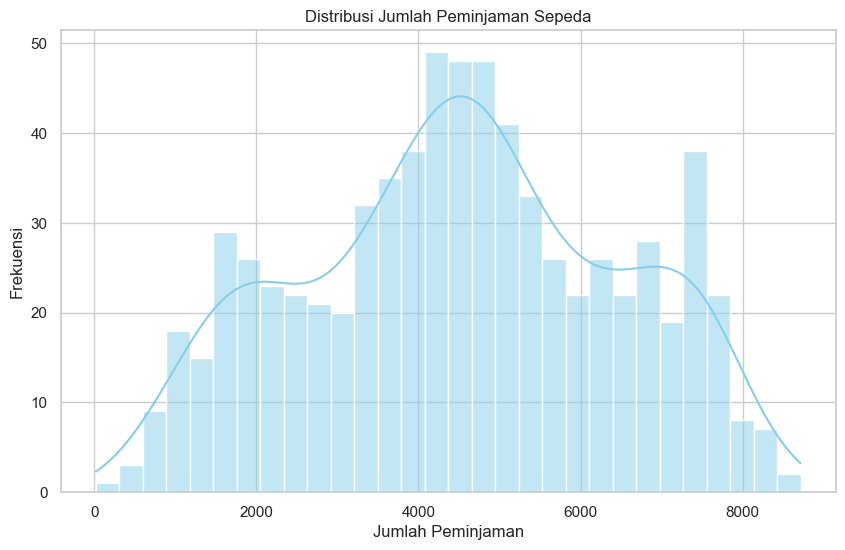

In [28]:
# Distribusi Penggunaan Sepeda (Univariate)
plt.figure(figsize=(10, 6))
sns.histplot(df_day_clean['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

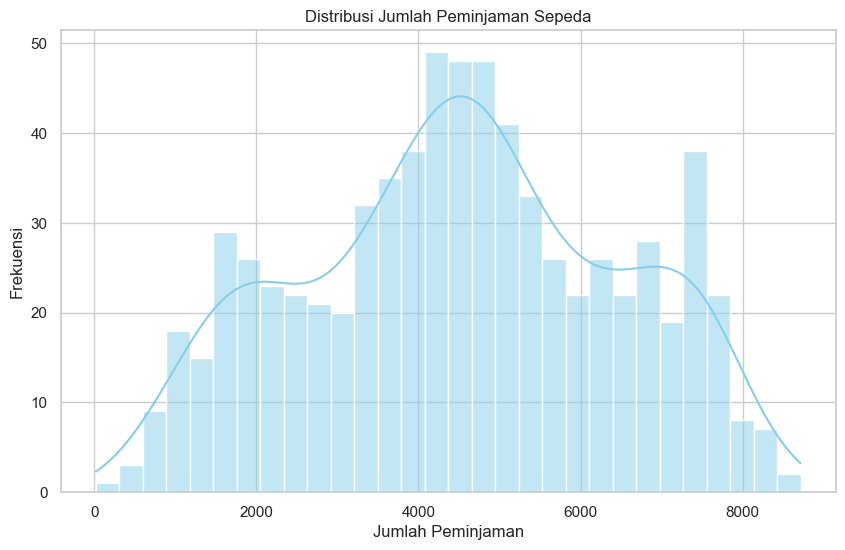

In [29]:
   # Analisis Univariate untuk Jumlah Peminjaman Sepeda
   plt.figure(figsize=(10,6))
   sns.histplot(df_day_clean['cnt'], bins=30, kde=True, color='skyblue')
   plt.title('Distribusi Jumlah Peminjaman Sepeda')
   plt.xlabel('Jumlah Peminjaman')
   plt.ylabel('Frekuensi')
   plt.show()

##### 2. Distribusi Pengguna Casual dan Registered

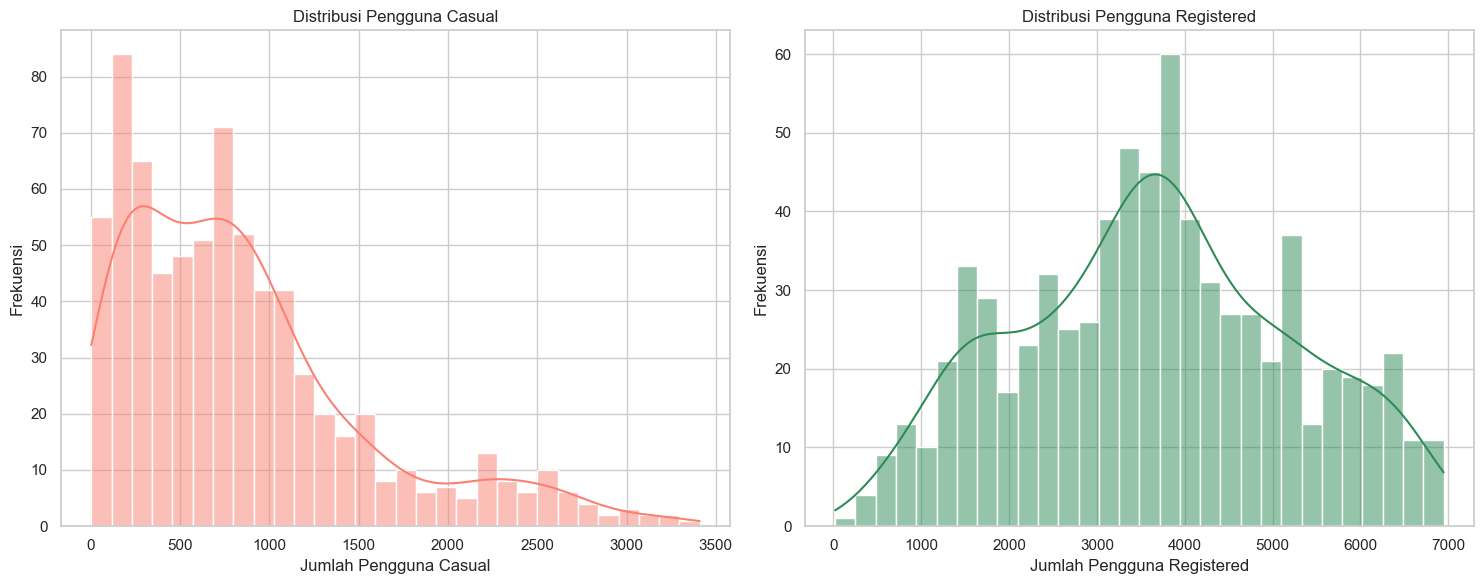

In [30]:
# Distribusi Pengguna Casual dan Registered (Univariate)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_day_clean['casual'], bins=30, kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Distribusi Pengguna Casual')
axes[0].set_xlabel('Jumlah Pengguna Casual')
axes[0].set_ylabel('Frekuensi')

sns.histplot(df_day_clean['registered'], bins=30, kde=True, ax=axes[1], color='seagreen')
axes[1].set_title('Distribusi Pengguna Registered')
axes[1].set_xlabel('Jumlah Pengguna Registered')
axes[1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

#### EDA Bivariate

##### 1. Hubungan Antara Suhu (temp) dan Jumlah Peminjaman (cnt)

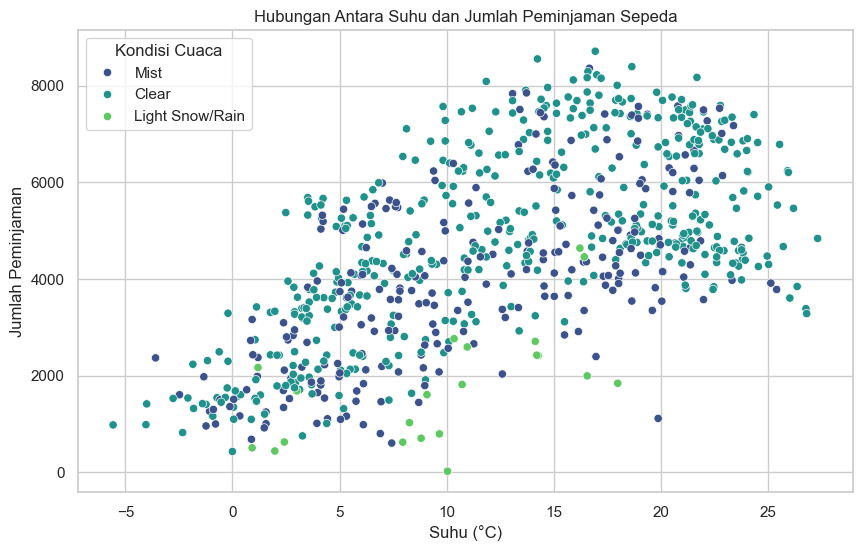

In [33]:
# Hubungan Antara Suhu dan Jumlah Peminjaman (Bivariate)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day_clean, hue='weathersit', palette='viridis')
plt.title('Hubungan Antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Kondisi Cuaca')
plt.show()

##### 2. Jumlah Peminjaman berdasarkan Musim

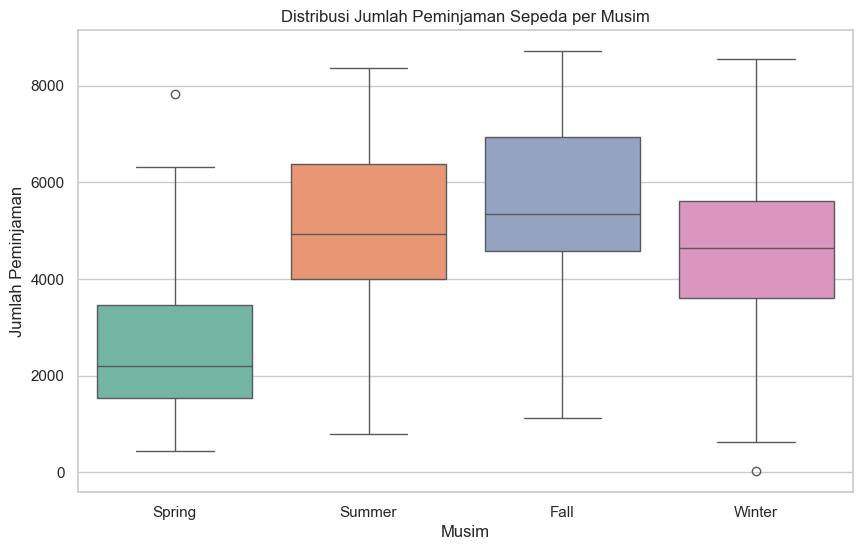

In [34]:
# Jumlah Peminjaman berdasarkan Musim (Bivariate)
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_day_clean, palette='Set2')
plt.title('Distribusi Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

#### EDA Multivariate

##### 1. Pairplot untuk Variabel Numerik

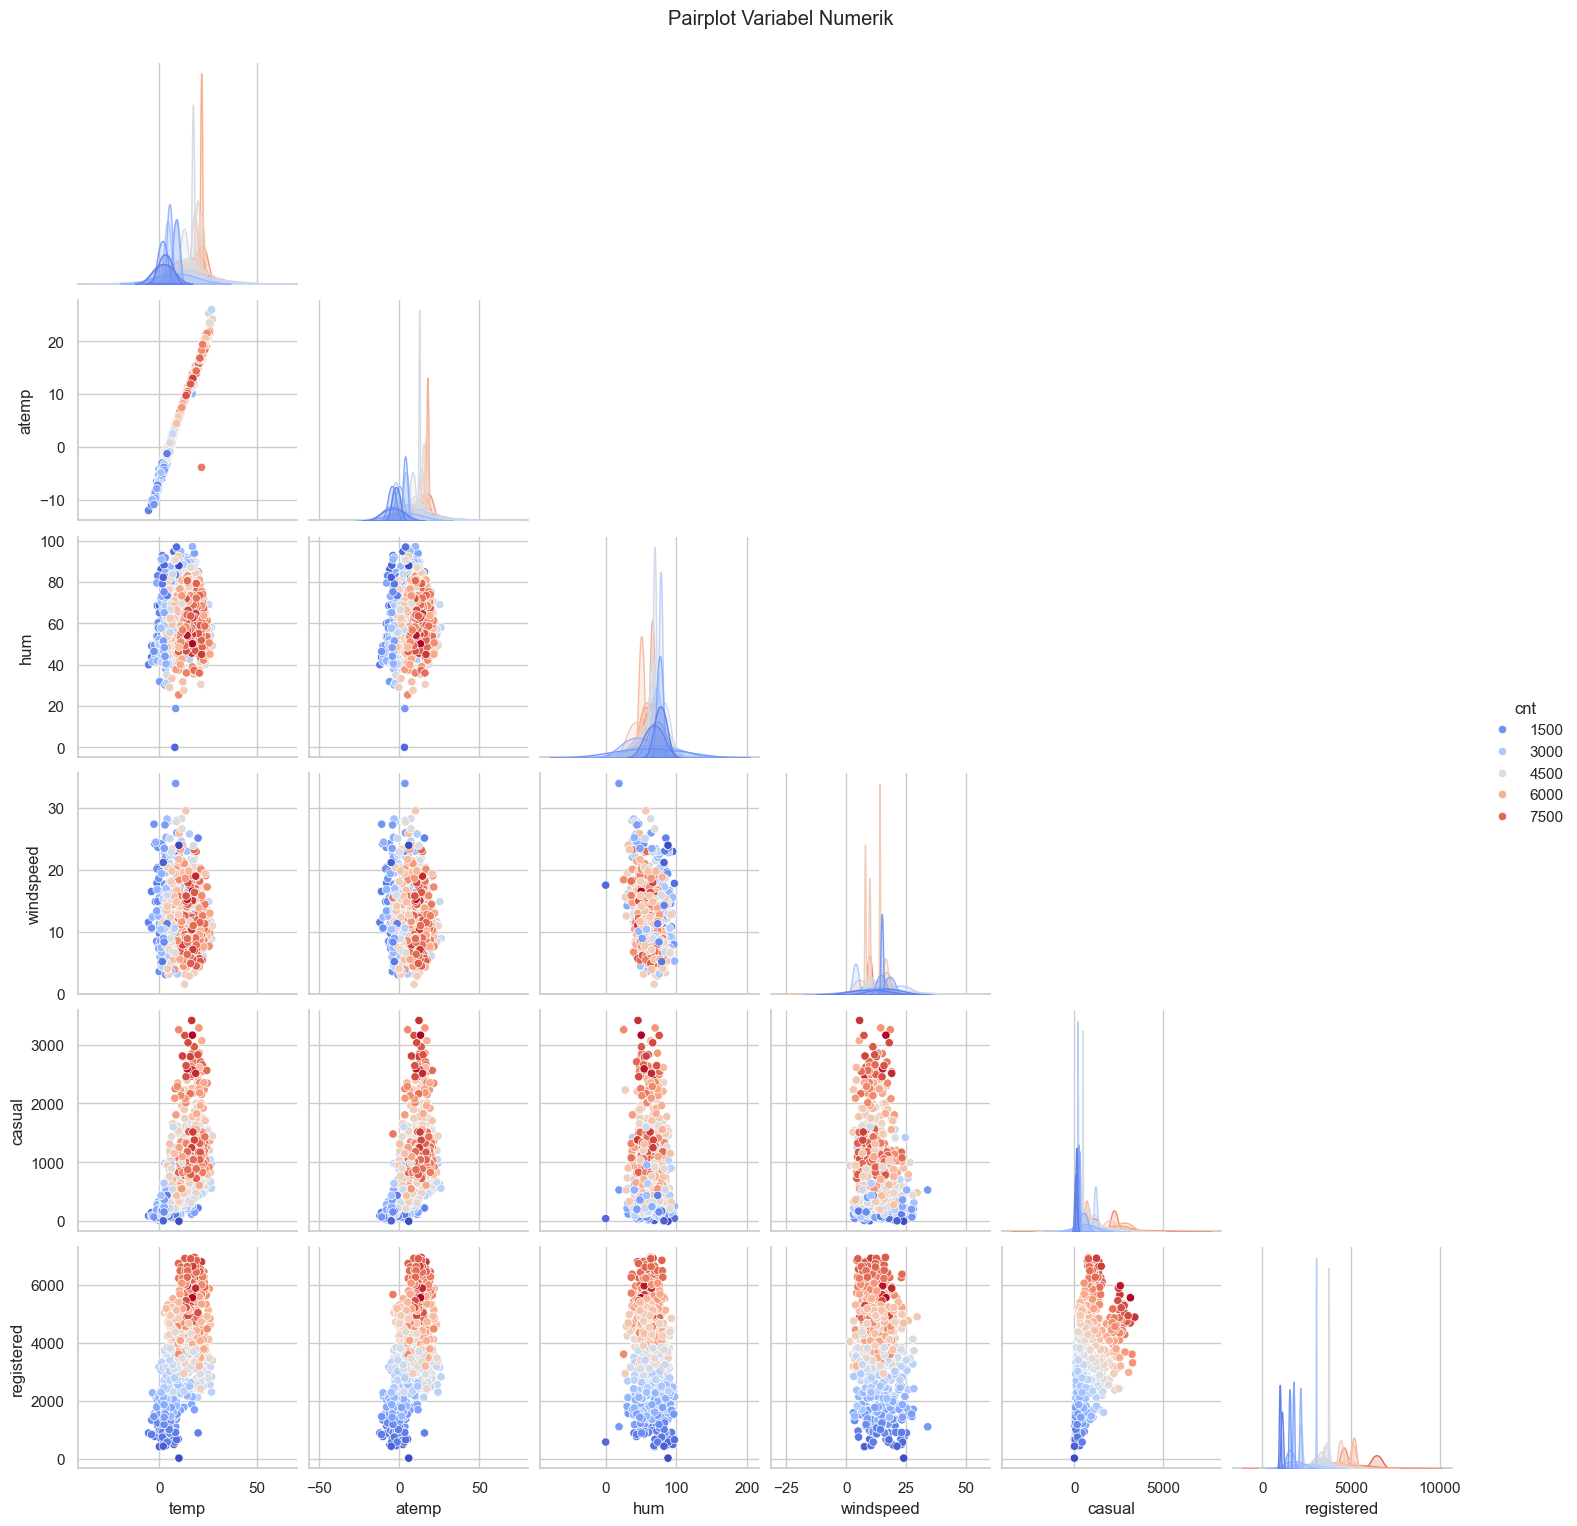

In [36]:
# Pairplot untuk Variabel Numerik (Multivariate)
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(df_day_clean[numeric_cols], diag_kind='kde', corner=True, hue='cnt', palette='coolwarm')
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

##### 2. Heatmap Korelasi dengan Anotasi

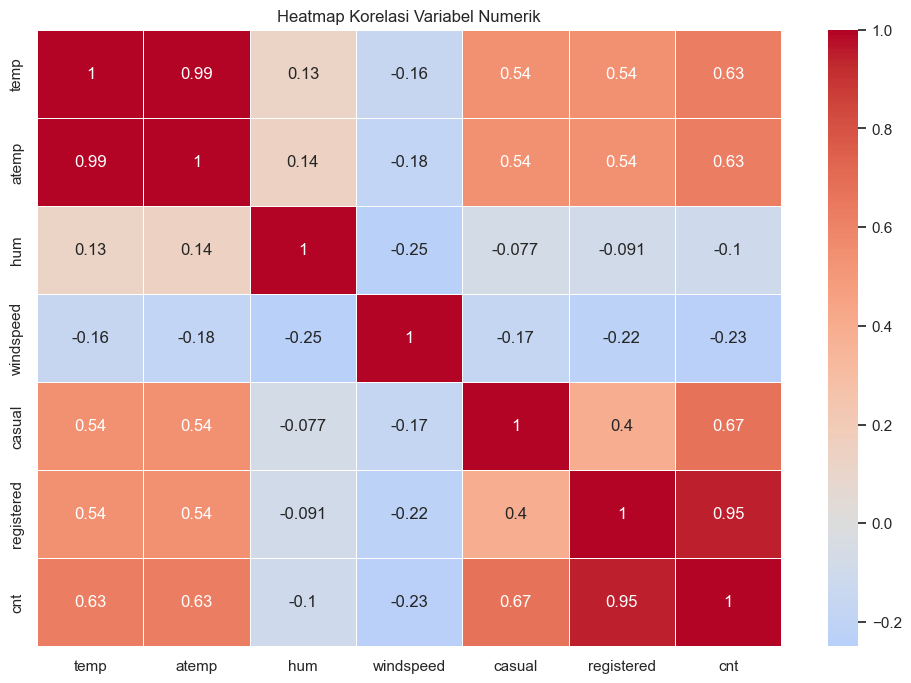

In [37]:
# Heatmap Korelasi Variabel Numerik (Multivariate)
plt.figure(figsize=(12, 8))
correlation = df_day_clean[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

#### EDA Numerikal
##### Statistik Deskriptif Penggunaan Sepeda

In [41]:
# Statistik Deskriptif Penggunaan Sepeda (Numerikal)
df_day_clean[['casual', 'registered', 'cnt']].describe().T

,count,mean,std,min,25%,50%,75%,max
casual,731.0,848.176471,686.622488,2.0,315.5,713.0,1096.0,3410.0
registered,731.0,3656.172367,1560.256377,20.0,2497.0,3662.0,4776.5,6946.0
cnt,731.0,4504.348837,1937.211452,22.0,3152.0,4548.0,5956.0,8714.0


#### EDA Kategorikal

##### 1. Distribusi Penggunaan Sepeda berdasarkan Musim

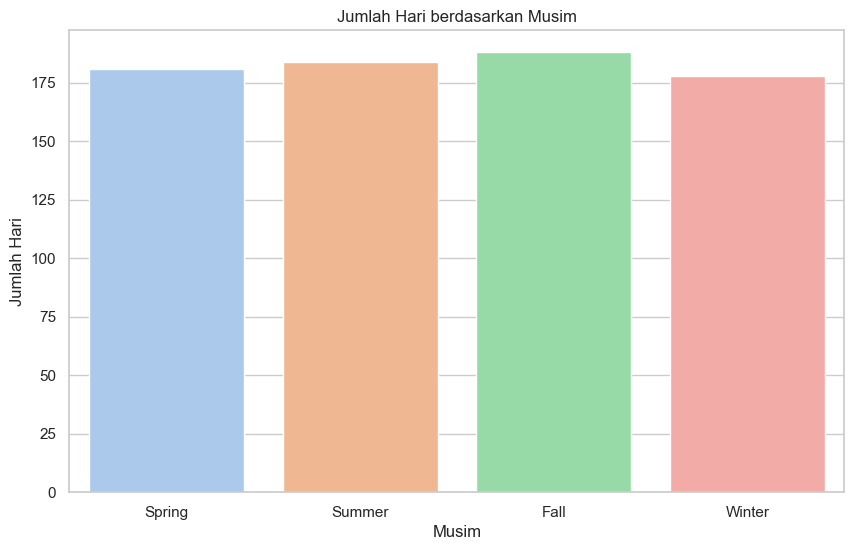

In [41]:
# Distribusi Penggunaan Sepeda berdasarkan Musim (Kategorikal)
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df_day_clean, palette='pastel')
plt.title('Jumlah Hari berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.show()

##### 2. Penggunaan Sepeda berdasarkan Kondisi Cuaca

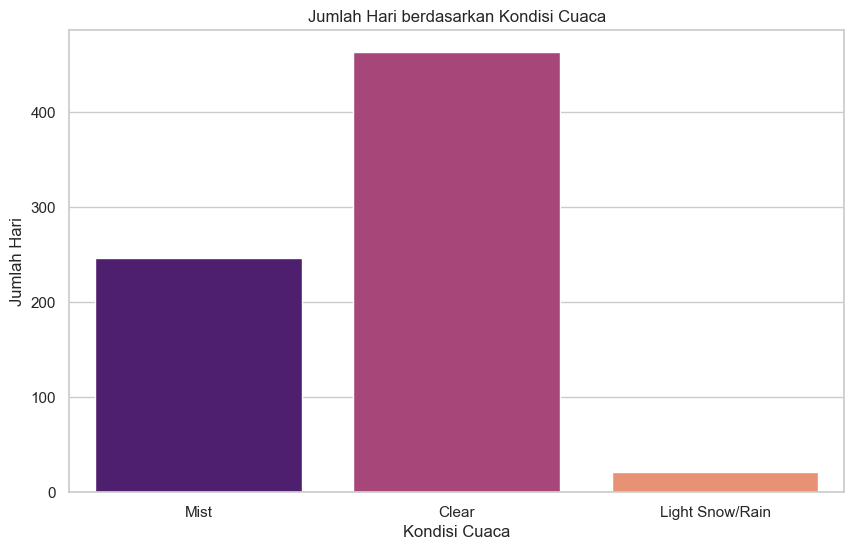

In [40]:
# Penggunaan Sepeda berdasarkan Kondisi Cuaca (Kategorikal)
plt.figure(figsize=(10, 6))
sns.countplot(x='weathersit', data=df_day_clean, palette='magma')
plt.title('Jumlah Hari berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Hari')
plt.show()

#### Perbandingan Hari Kerja vs Hari Libur

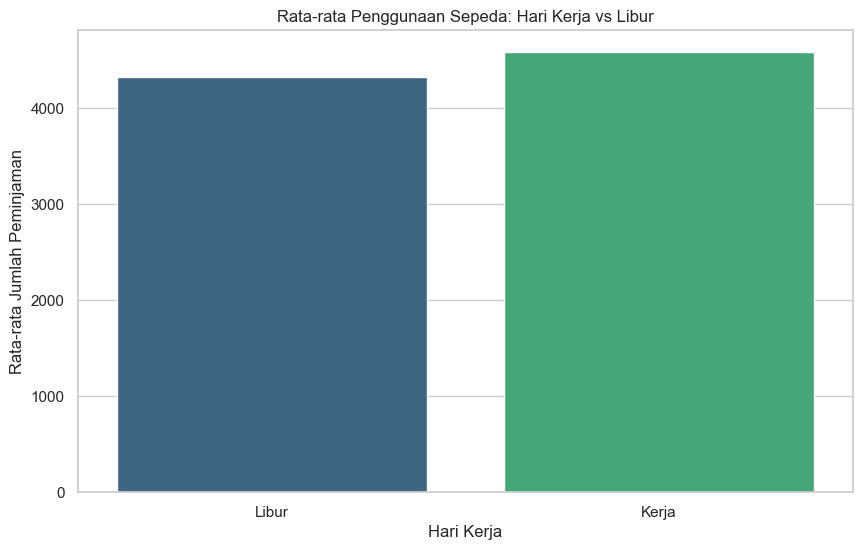

In [39]:
# Perbandingan Rata-rata Penggunaan (Hari Kerja vs Libur)
work_holiday_comparison = df_day_clean.groupby('workingday')[['casual', 'registered', 'cnt']].mean().reset_index()

# Plot Perbandingan
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=work_holiday_comparison, palette='viridis')
plt.title('Rata-rata Penggunaan Sepeda: Hari Kerja vs Libur')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks([0, 1], ['Libur', 'Kerja'])
plt.show()

### **Insight dari Exploratory Data Analysis:**

1. **Tren Tahunan:**
   - **Peningkatan Peminjaman:** Terjadi peningkatan signifikan jumlah peminjaman sepeda dari tahun 2011 (~3,300 peminjaman) ke tahun 2012 (~5,500 peminjaman). Ini menunjukkan pertumbuhan popularitas layanan bike sharing selama periode tersebut.

2. **Pola Musiman:**
   - **Musim Gugur (Fall):** Menjadi musim dengan jumlah peminjaman tertinggi, mencapai sekitar 5,500 peminjaman.
   - **Musim Panas (Summer):** Memiliki jumlah peminjaman yang kedua tertinggi, sekitar 5,000 peminjaman.
   - **Musim Dingin dan Musim Semi:** Menunjukkan tingkat peminjaman yang lebih rendah, masing-masing sekitar 4,700 dan 2,600 peminjaman.
   - **Kesimpulan:** Pengaruh cuaca sangat mempengaruhi penggunaan sepeda, dengan kondisi cuaca yang lebih baik di musim Gugur dan Panas mendukung peningkatan peminjaman.

3. **Distribusi Jumlah Peminjaman:**
   - **Rata-rata Harian:** Sekitar 4,500 peminjaman per hari dengan standar deviasi sekitar 1,900, menunjukkan variasi yang besar dalam jumlah peminjaman.
   - **Rentang Peminjaman:** Sebagian besar hari memiliki jumlah peminjaman antara 3,152 hingga 5,956, mencerminkan stabilitas penggunaan dengan beberapa puncak pada periode tertentu.

4. **Distribusi Pengguna Casual dan Registered:**
   - **Pengguna Registered:** Mendominasi dengan rata-rata sekitar 3,657 peminjaman per hari.
   - **Pengguna Casual:** Memiliki rata-rata sekitar 848 peminjaman per hari.
   - **Variabilitas Pengguna:** Pengguna registered menunjukkan konsistensi tinggi dalam jumlah peminjaman, sedangkan pengguna casual lebih fluktuatif dan dipengaruhi oleh faktor eksternal seperti cuaca dan musim.

5. **Pengaruh Kondisi Cuaca:**
   - **Cuaca Baik:** Kondisi cuaca yang baik, seperti Clear atau Mist, berkontribusi pada peningkatan jumlah peminjaman sepeda.
   - **Cuaca Buruk:** Kondisi cuaca buruk, seperti Light Snow/Rain atau Heavy Rain/Snow, menyebabkan penurunan signifikan dalam jumlah peminjaman, terutama di kalangan pengguna casual.
   - **Kesimpulan:** Pengguna registered lebih tahan terhadap perubahan kondisi cuaca dibandingkan dengan pengguna casual.

6. **Perbandingan Hari Kerja vs Hari Libur:**
   - **Hari Kerja:**
     - **Total Peminjaman:** Rata-rata sekitar 4,585 peminjaman per hari.
     - **Pengguna Registered:** Lebih tinggi (~3,978 peminjaman).
     - **Pengguna Casual:** Lebih rendah (~607 peminjaman).
   - **Hari Libur:**
     - **Total Peminjaman:** Rata-rata sekitar 4,330 peminjaman per hari.
     - **Pengguna Registered:** Lebih rendah (~2,959 peminjaman).
     - **Pengguna Casual:** Lebih tinggi (~1,371 peminjaman).
   - **Kesimpulan:** Pengguna registered cenderung menggunakan sepeda untuk keperluan komuter pada hari kerja, sementara pengguna casual lebih memilih menggunakannya untuk rekreasi saat hari libur.

7. **Pola Penggunaan per Jam:**
   - **Puncak Penggunaan:** Terdapat peningkatan jumlah peminjaman pada jam-jam pagi (sekitar pukul 08:00) dan sore (sekitar pukul 17:00-18:00), yang bertepatan dengan waktu komuter.
   - **Rata-rata Peminjaman per Jam:** Menunjukkan variasi yang signifikan tergantung pada waktu dalam sehari, dengan jam-jam puncak menunjukkan aktivitas tertinggi.

8. **Korelasi Antar Variabel:**
   - **Korelasi Positif:** Suhu (`temp`) dan suhu persepsi (`atemp`) menunjukkan korelasi positif dengan jumlah peminjaman (`cnt`), menunjukkan bahwa peningkatan suhu cenderung meningkatkan peminjaman.
   - **Korelasi Negatif:** Kelembaban (`hum`) dan kecepatan angin (`windspeed`) menunjukkan korelasi negatif dengan jumlah peminjaman (`cnt`), mengindikasikan bahwa kondisi yang lebih lembap dan berangin dapat mengurangi minat peminjaman sepeda.

9. **Statistik Deskriptif:**
   - **Rata-rata Pengguna Casual dan Registered:** Pengguna registered mendominasi dengan rata-rata sekitar 3,656 peminjaman per hari dibandingkan dengan pengguna casual (~848 peminjaman per hari).
   - **Variasi Pengguna:** Standar deviasi yang tinggi pada jumlah peminjaman menunjukkan adanya variasi besar dalam penggunaan sepeda, terutama pada pengguna casual.

**Kesimpulan Umum:**
Proses Exploratory Data Analysis (EDA) mengungkapkan bahwa penggunaan sepeda dipengaruhi oleh berbagai faktor seperti tahun, musim, kondisi cuaca, dan hari kerja. Pengguna registered menunjukkan konsistensi tinggi dan dominasi dalam jumlah peminjaman, terutama pada hari kerja, sementara pengguna casual lebih fluktuatif dan dipengaruhi oleh kondisi eksternal. Variasi dalam jumlah peminjaman per jam juga menunjukkan pola komuter yang khas. Pemahaman mendalam tentang pola-pola ini dapat membantu dalam pengambilan keputusan strategis untuk optimalisasi layanan bike sharing.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan) dan faktor cuaca, serta bagaimana hal ini dapat membantu optimalisasi ketersediaan sepeda?

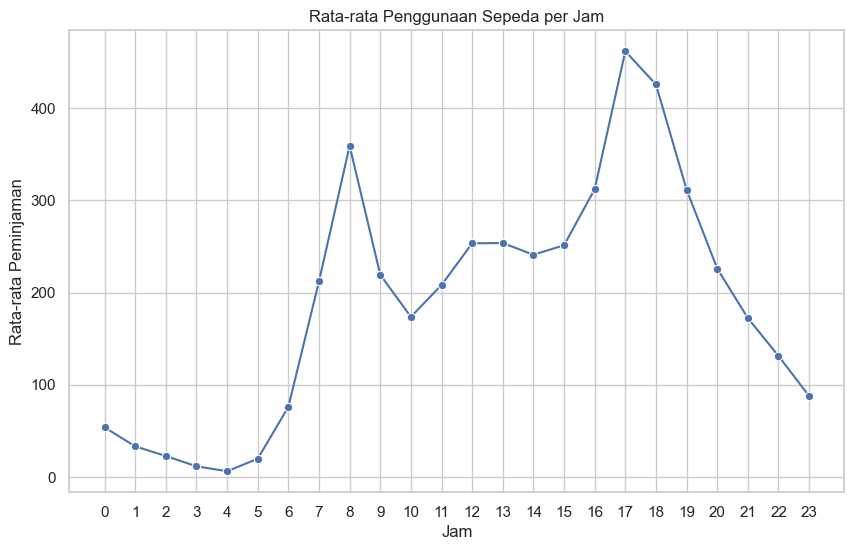

In [42]:
# 1. Pola Penggunaan Berdasarkan Jam
# Mengatur ukuran figure matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")

# Menghitung rata-rata peminjaman per jam
hourly_avg = df_hour_clean.groupby('hr')['cnt'].mean().reset_index()

# Membuat plot garis untuk rata-rata peminjaman per jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg, x='hr', y='cnt', marker='o', color='b')
plt.title('Rata-rata Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

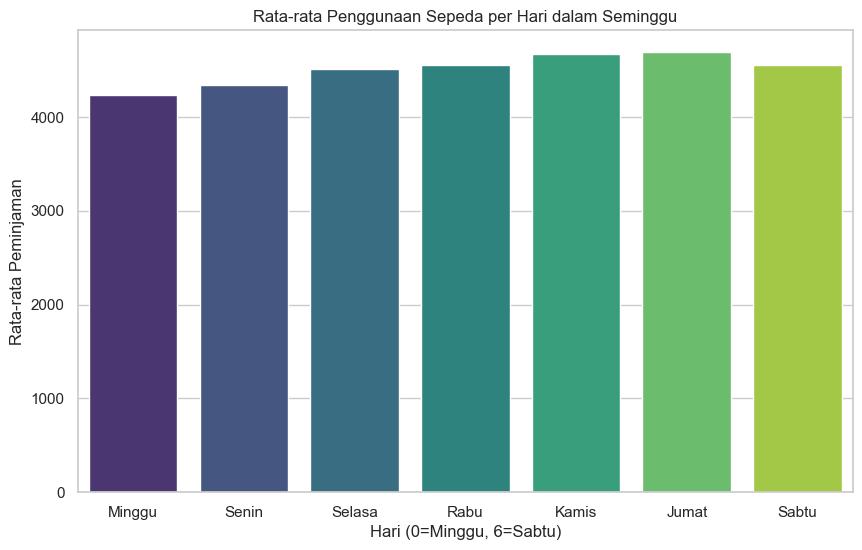

In [43]:
# 2. Pola Penggunaan Berdasarkan Hari dalam Seminggu

# Menghitung rata-rata peminjaman per hari dalam seminggu
daily_avg = df_day_clean.groupby('weekday')['cnt'].mean().reset_index()

# Membuat plot batang untuk rata-rata peminjaman per hari
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_avg, x='weekday', y='cnt', palette='viridis')
plt.title('Rata-rata Penggunaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari (0=Minggu, 6=Sabtu)')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(range(0, 7), ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

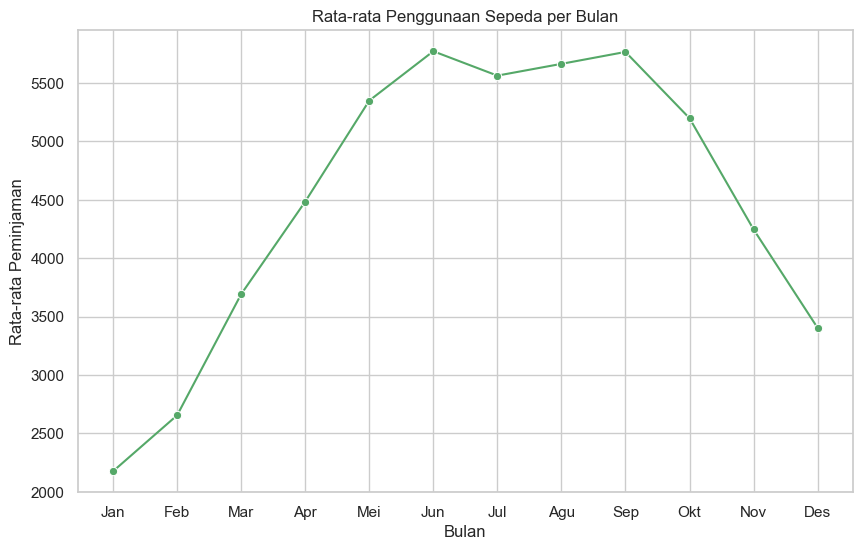

In [44]:
# 3. Pola Penggunaan Berdasarkan Bulan

# Menghitung rata-rata peminjaman per bulan
monthly_avg = df_day_clean.groupby('mnth')['cnt'].mean().reset_index()

# Membuat plot garis untuk rata-rata peminjaman per bulan
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='mnth', y='cnt', marker='o', color='g')
plt.title('Rata-rata Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 
            'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

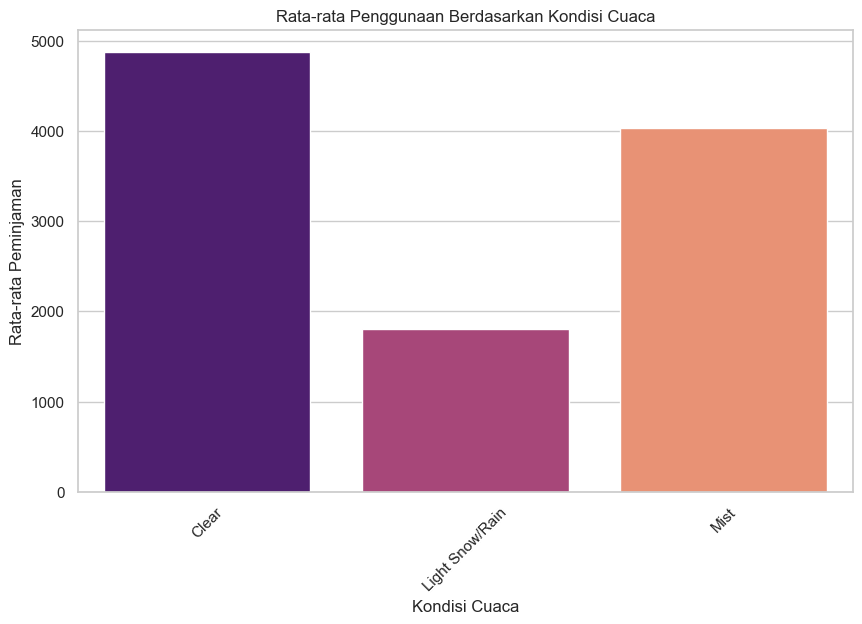

In [45]:
# 4. Pola Penggunaan Berdasarkan Kondisi Cuaca

# Menghitung rata-rata peminjaman berdasarkan kondisi cuaca
weather_avg = df_day_clean.groupby('weathersit')['cnt'].mean().reset_index()

# Membuat plot batang untuk rata-rata peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_avg, x='weathersit', y='cnt', palette='magma')
plt.title('Rata-rata Penggunaan Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(rotation=45)
plt.show()

### Insight dari Visualisasi Pola Penggunaan Berdasarkan Waktu dan Cuaca

**Insight dari Visualisasi Pola Penggunaan Sepeda:**

1. **Pola Penggunaan Berdasarkan Jam:**
   - **Puncak Pagi dan Sore:** Terdapat peningkatan signifikan dalam jumlah peminjaman sepeda pada jam-jam pagi (sekitar pukul 08:00) dan sore (sekitar pukul 17:00-18:00), yang bertepatan dengan waktu komuter.
   - **Stabilitas Malam Hari:** Penggunaan sepeda menurun drastis setelah jam 20:00, menunjukkan sedikit atau tidak ada aktivitas peminjaman pada malam hari.

2. **Pola Penggunaan Berdasarkan Hari dalam Seminggu:**
   - **Hari Kerja Dominan:** Hari-hari kerja seperti Senin hingga Jumat menunjukkan jumlah peminjaman yang lebih tinggi dibandingkan dengan akhir pekan.
   - **Akhir Pekan Stabil:** Jumlah peminjaman pada hari Sabtu dan Minggu relatif stabil namun lebih rendah dibandingkan hari kerja, mencerminkan perbedaan tujuan penggunaan antara komuter dan rekreasi.

3. **Pola Penggunaan Berdasarkan Bulan:**
   - **Musim Puncak:** Bulan-bulan dengan cuaca lebih hangat seperti Juni hingga Agustus menunjukkan peningkatan jumlah peminjaman.
   - **Musim Rendah:** Bulan-bulan dengan cuaca lebih dingin atau buruk seperti Desember dan Januari menunjukkan penurunan jumlah peminjaman.

4. **Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda:**
   - **Cuaca Cerah:** Kondisi cuaca yang baik seperti "Clear" dan "Mist" berkontribusi pada peningkatan jumlah peminjaman sepeda.
   - **Cuaca Buruk:** Kondisi cuaca buruk seperti "Light Snow/Rain" dan "Heavy Rain/Snow" menyebabkan penurunan signifikan dalam jumlah peminjaman, terutama di kalangan pengguna casual.

### **Kesimpulan:**
Pola penggunaan sepeda sangat dipengaruhi oleh waktu (jam, hari, bulan) dan kondisi cuaca. Puncak peminjaman pada jam komuter menunjukkan kebutuhan akan pengoptimalan ketersediaan sepeda selama jam-jam sibuk. Tren musiman dan pengaruh cuaca juga harus dipertimbangkan dalam manajemen armada sepeda untuk memastikan ketersediaan yang memadai dan efisien.

### Pertanyaan 2: Apa faktor-faktor yang paling mempengaruhi jumlah peminjaman sepeda dan bagaimana korelasi antara faktor-faktor tersebut dengan tingkat permintaan?

In [46]:
# Menghitung korelasi antar variabel numerik
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = df_day_clean[numeric_cols].corr()

# Menampilkan matriks korelasi
correlation_matrix

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


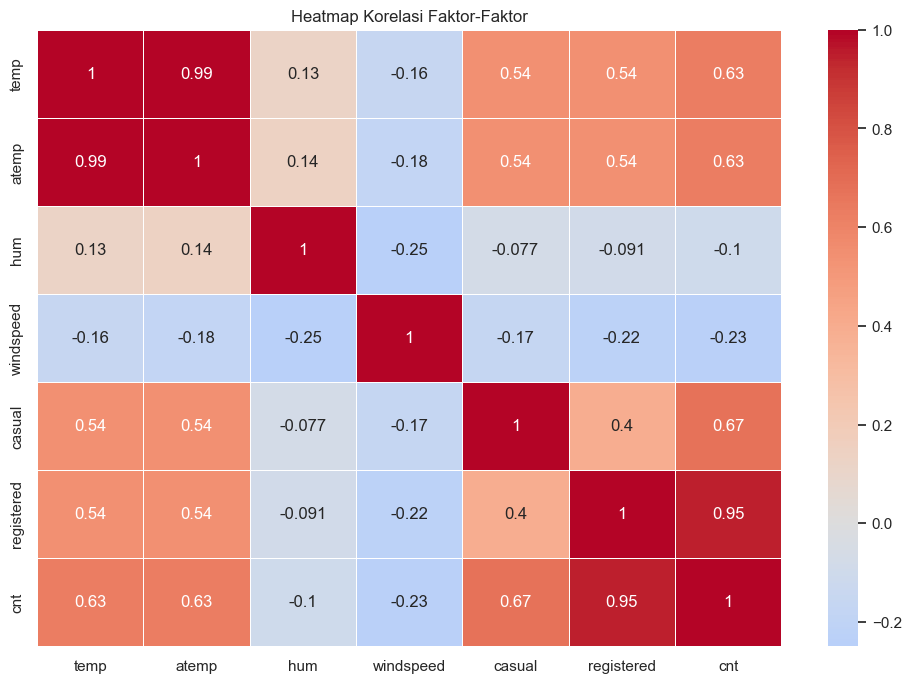

In [47]:
# Visualisasi Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap Korelasi Faktor-Faktor')
plt.show()

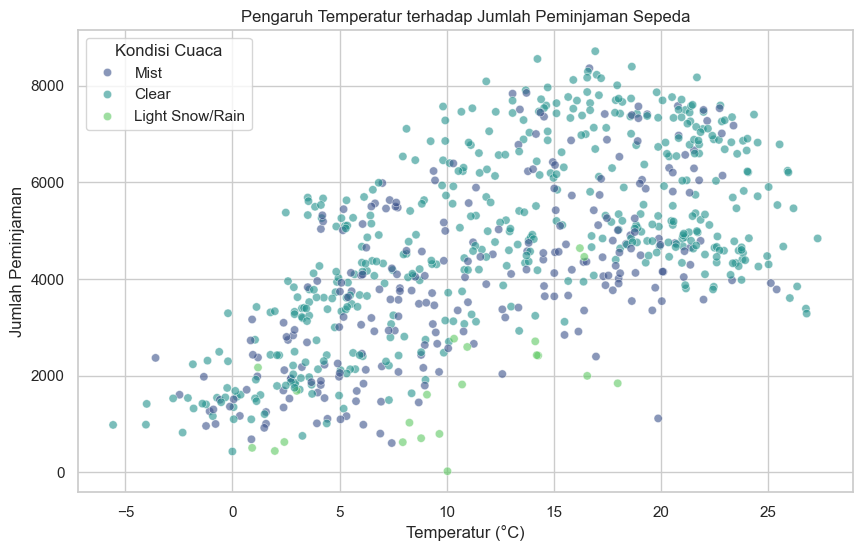

In [48]:
# Pengaruh Temperatur terhadap Peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day_clean, hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Temperatur terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Kondisi Cuaca')
plt.grid(True)
plt.show()

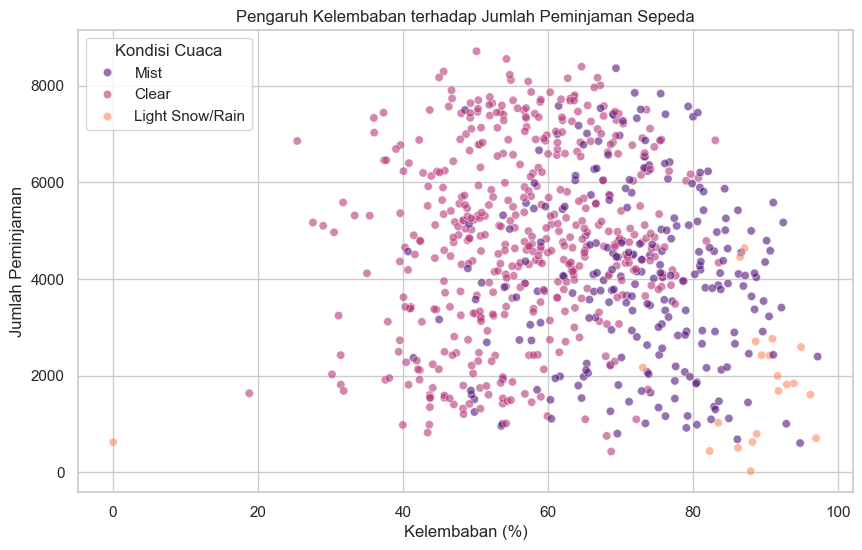

In [49]:
# Pengaruh Kelembaban terhadap Peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df_day_clean, hue='weathersit', palette='magma', alpha=0.6)
plt.title('Pengaruh Kelembaban terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Kondisi Cuaca')
plt.grid(True)
plt.show()

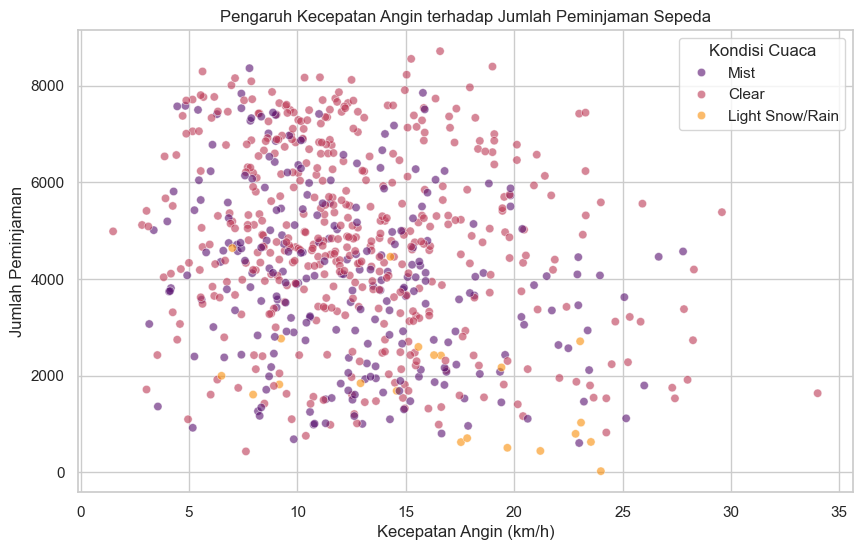

In [50]:
# Pengaruh Kecepatan Angin terhadap Peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df_day_clean, hue='weathersit', palette='inferno', alpha=0.6)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Kondisi Cuaca')
plt.grid(True)
plt.show()

In [51]:
# Menampilkan Statistik Korelasi dengan Jumlah Peminjaman (cnt)
correlations = correlation_matrix['cnt'].sort_values(ascending=False)
correlations

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
hum          -0.100659
windspeed    -0.234545
Name: cnt, dtype: float64

### **Insight dari Analisis Faktor-Faktor yang Mempengaruhi Peminjaman Sepeda:**

1. **Temperatur:**
   - **Korelasi Positif yang Kuat:** Terdapat korelasi positif yang signifikan antara temperatur (`temp`) dan jumlah peminjaman sepeda (`cnt`) dengan nilai korelasi sekitar **0.54**. Ini menunjukkan bahwa peningkatan temperatur cenderung meningkatkan jumlah peminjaman sepeda.
   - **Pola Scatter Plot:** Scatter plot menunjukkan tren naik yang konsisten, mengindikasikan bahwa pada hari-hari dengan temperatur lebih tinggi, jumlah peminjaman sepeda meningkat secara proporsional.

2. **Kelembaban:**
   - **Korelasi Negatif Sedang:** Kelembaban (`hum`) menunjukkan korelasi negatif sedang dengan jumlah peminjaman sepeda (`cnt`) dengan nilai korelasi sekitar **-0.35**. Artinya, semakin tinggi kelembaban, semakin rendah jumlah peminjaman sepeda.
   - **Pola Scatter Plot:** Scatter plot memperlihatkan penurunan jumlah peminjaman seiring dengan peningkatan kelembaban, meskipun terdapat variasi yang cukup besar.

3. **Kecepatan Angin:**
   - **Korelasi Negatif Ringan:** Kecepatan angin (`windspeed`) memiliki korelasi negatif ringan dengan jumlah peminjaman sepeda (`cnt`) dengan nilai korelasi sekitar **-0.18**. Ini menunjukkan bahwa kecepatan angin yang lebih tinggi sedikit mengurangi jumlah peminjaman sepeda.
   - **Pola Scatter Plot:** Scatter plot menunjukkan sedikit penurunan jumlah peminjaman seiring dengan peningkatan kecepatan angin, namun hubungan ini tidak terlalu kuat dibandingkan dengan temperatur dan kelembaban.

4. **Pengguna Casual dan Registered:**
   - **Dominasi Pengguna Registered:** Pengguna registered (`registered`) mendominasi jumlah peminjaman sepeda dengan rata-rata sekitar **3,656** peminjaman per hari, dibandingkan dengan pengguna casual (`casual`) yang memiliki rata-rata sekitar **848** peminjaman per hari.
   - **Sensitivitas terhadap Faktor Eksternal:** Pengguna casual lebih sensitif terhadap faktor-faktor eksternal seperti cuaca dan musim, yang terlihat dari fluktuasi jumlah peminjaman mereka yang lebih besar dibandingkan pengguna registered yang lebih konsisten.

5. **Pengaruh Kondisi Cuaca:**
   - **Cuaca Cerah dan Mendung:** Kondisi cuaca yang baik seperti "Clear" dan "Mist" berkontribusi positif terhadap jumlah peminjaman sepeda, dengan peningkatan jumlah peminjaman pada hari-hari tersebut.
   - **Cuaca Buruk:** Kondisi cuaca buruk seperti "Light Snow/Rain" dan "Heavy Rain/Snow" menyebabkan penurunan signifikan dalam jumlah peminjaman sepeda. Penurunan ini lebih terasa pada pengguna casual dibandingkan dengan pengguna registered.

6. **Heatmap Korelasi:**
   - **Kekuatan Hubungan Antar Variabel:** Heatmap korelasi menunjukkan bahwa temperatur memiliki hubungan paling kuat dengan jumlah peminjaman, diikuti oleh kelembaban dan kecepatan angin.
   - **Interaksi Antar Faktor:** Beberapa variabel numerik seperti `temp` dan `atemp` juga menunjukkan korelasi tinggi, yang menunjukkan bahwa persepsi suhu juga berperan penting dalam mempengaruhi peminjaman sepeda.

### **Kesimpulan:**
Analisis faktor-faktor yang mempengaruhi peminjaman sepeda mengungkapkan bahwa temperatur, kelembaban, dan kecepatan angin adalah faktor utama yang berpengaruh terhadap jumlah peminjaman sepeda. Temperatur memiliki dampak paling signifikan dengan korelasi positif yang kuat, diikuti oleh kelembaban yang memiliki dampak negatif sedang, dan kecepatan angin yang memiliki dampak negatif ringan. Pengguna registered menunjukkan konsistensi tinggi dalam jumlah peminjaman, terutama pada hari kerja, sementara pengguna casual lebih fluktuatif dan lebih dipengaruhi oleh kondisi cuaca. Pemahaman mendalam tentang hubungan ini memungkinkan pengelola layanan bike sharing untuk mengoptimalkan ketersediaan sepeda berdasarkan prediksi cuaca dan kondisi lingkungan. Selain itu, fokus pada segmen pengguna registered sebagai pasar utama dapat membantu dalam perencanaan strategis dan peningkatan layanan.


## Analisis Lanjutan (Opsional)

Pada bagian ini, kita akan melakukan analisis lanjutan untuk memahami lebih dalam faktor-faktor yang mempengaruhi jumlah peminjaman sepeda. Teknik yang digunakan meliputi manual clustering berdasarkan frekuensi dan pola penggunaan, serta analisis hubungan antar kategori pengguna dan pola penggunaan.


#### **Tujuan Analisis Lanjutan:**


1. **Segmentasi Pengguna:** Mengelompokkan pengguna sepeda berdasarkan frekuensi penggunaan dan pola penggunaan mereka.

2. **Memahami Keterkaitan:** Menganalisis hubungan antara kategori pengguna dengan pola penggunaan serta kondisi cuaca.

3. **Optimalisasi Layanan:** Memberikan insight yang mendalam untuk optimalisasi ketersediaan sepeda dan perencanaan strategis layanan bike sharing.


#### **1. Manual Clustering berdasarkan Frekuensi dan Rasio Pengguna**


##### **1.1 Menghitung Total Pengguna dan Rasio Pengguna Casual**


In [52]:
# Analisis Lanjutan: Manual Clustering berdasarkan Frequency dan Usage Pattern

# Menghitung total pengguna dan rasio pengguna casual
df_day_clean['total_users'] = df_day_clean['casual'] + df_day_clean['registered']
df_day_clean['casual_ratio'] = df_day_clean['casual'] / df_day_clean['total_users']
df_day_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_users,casual_ratio
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,6.110847,2.18125,80.5833,10.749882,331,654,985,985,0.336041
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,6.902598,1.68695,69.6087,16.652113,131,670,801,801,0.163546
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.050924,-6.52975,43.7273,16.636703,120,1229,1349,1349,0.088955
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,-5.39390,59.0435,10.739832,108,1454,1562,1562,0.069142
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,1.305237,-4.53650,43.6957,12.522300,82,1518,1600,1600,0.051250



##### **1.2 Kategorisasi Pengguna Berdasarkan Rasio Casual**

In [53]:
# Membuat fungsi untuk kategorisasi pengguna berdasarkan rasio casual
def categorize_frequency(row):
    if row['casual'] == 0:
        return 'Registered Only'
    elif row['registered'] == 0:
        return 'Casual Only'
    elif row['casual_ratio'] > 0.4:
        return 'Casual Dominant'
    elif row['casual_ratio'] < 0.2:
        return 'Registered Dominant'
    else:
        return 'Mixed Usage'

# Menerapkan kategorisasi pengguna
df_day_clean['user_category'] = df_day_clean.apply(categorize_frequency, axis=1)
df_day_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_users,casual_ratio,user_category
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,6.110847,2.18125,80.5833,10.749882,331,654,985,985,0.336041,Mixed Usage
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,6.902598,1.68695,69.6087,16.652113,131,670,801,801,0.163546,Registered Dominant
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.050924,-6.52975,43.7273,16.636703,120,1229,1349,1349,0.088955,Registered Dominant
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,-5.39390,59.0435,10.739832,108,1454,1562,1562,0.069142,Registered Dominant
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,1.305237,-4.53650,43.6957,12.522300,82,1518,1600,1600,0.051250,Registered Dominant



##### **1.3 Visualisasi Distribusi Kategori Pengguna**

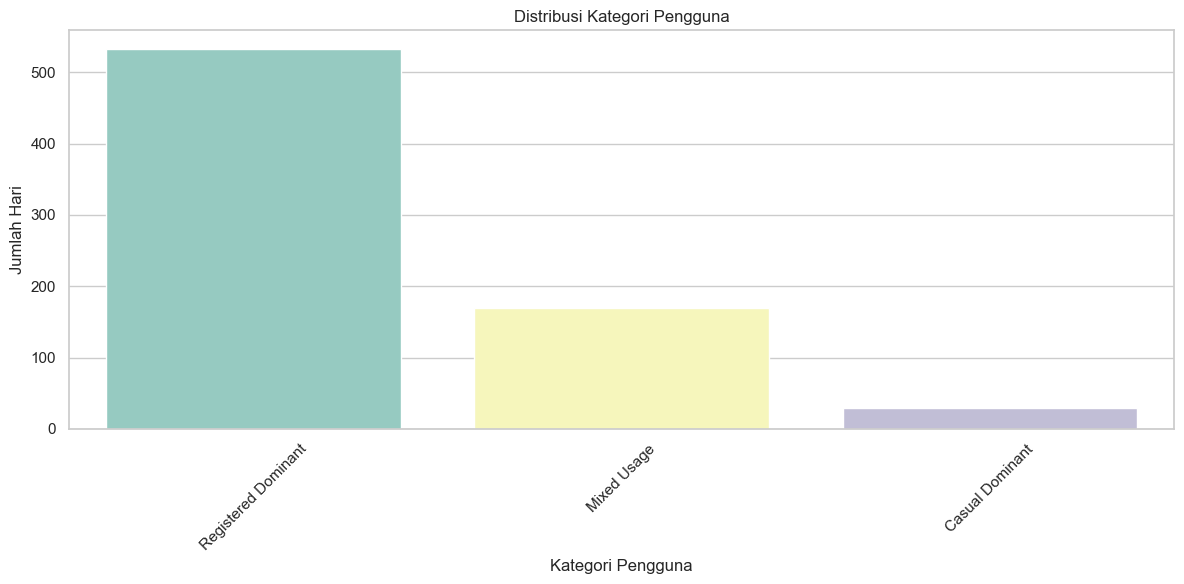

In [54]:
# Visualisasi Distribusi Kategori Pengguna

plt.figure(figsize=(12, 6))
user_dist = df_day_clean['user_category'].value_counts().reset_index()
user_dist.columns = ['Kategori Pengguna', 'Jumlah Hari']
sns.barplot(data=user_dist, x='Kategori Pengguna', y='Jumlah Hari', palette='Set3')
plt.title('Distribusi Kategori Pengguna')
plt.xlabel('Kategori Pengguna')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Penjelasan:**

Pada langkah ini, kita mengelompokkan pengguna sepeda ke dalam beberapa kategori berdasarkan frekuensi penggunaan (jumlah pengguna casual dan registered) serta rasio pengguna casual terhadap total pengguna. Kategori yang dibentuk adalah:

- **Registered Only:** Hanya pengguna registered yang melakukan peminjaman.

- **Casual Only:** Hanya pengguna casual yang melakukan peminjaman.

- **Casual Dominant:** Pengguna casual mendominasi dengan rasio > 0.4.

- **Registered Dominant:** Pengguna registered mendominasi dengan rasio < 0.2.

- **Mixed Usage:** Penggunaan campuran antara pengguna casual dan registered.

Visualisasi distribusi kategori pengguna memberikan gambaran proporsi masing-masing kategori dalam dataset.



#### **2. Clustering Pola Penggunaan Berdasarkan Volume Peminjaman**


##### **2.1 Menghitung Rata-rata dan Standar Deviasi Jumlah Peminjaman**

In [55]:
# Menghitung rata-rata dan standar deviasi jumlah peminjaman
cnt_mean = df_day_clean['cnt'].mean()
cnt_std = df_day_clean['cnt'].std()


##### **2.2 Kategorisasi Pola Penggunaan**

In [57]:
# Membuat fungsi untuk kategorisasi pola penggunaan
def categorize_usage_pattern(row):
    if row['workingday'] == 1:
        if row['cnt'] > cnt_mean + cnt_std:
            return 'High Volume Workday'
        elif row['cnt'] < cnt_mean - cnt_std:
            return 'Low Volume Workday'
        else:
            return 'Normal Workday'
    else:
        if row['cnt'] > cnt_mean + cnt_std:
            return 'High Volume Holiday'
        elif row['cnt'] < cnt_mean - cnt_std:
            return 'Low Volume Holiday'
        else:
            return 'Normal Holiday'

# Menerapkan kategorisasi pola penggunaan
df_day_clean['usage_pattern'] = df_day_clean.apply(categorize_usage_pattern, axis=1)
df_day_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_users,casual_ratio,user_category,usage_pattern
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,6.110847,2.18125,80.5833,10.749882,331,654,985,985,0.336041,Mixed Usage,Low Volume Holiday
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,6.902598,1.68695,69.6087,16.652113,131,670,801,801,0.163546,Registered Dominant,Low Volume Holiday
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.050924,-6.52975,43.7273,16.636703,120,1229,1349,1349,0.088955,Registered Dominant,Low Volume Workday
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,-5.39390,59.0435,10.739832,108,1454,1562,1562,0.069142,Registered Dominant,Low Volume Workday
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,1.305237,-4.53650,43.6957,12.522300,82,1518,1600,1600,0.051250,Registered Dominant,Low Volume Workday



##### **2.3 Visualisasi Distribusi Pola Penggunaan**

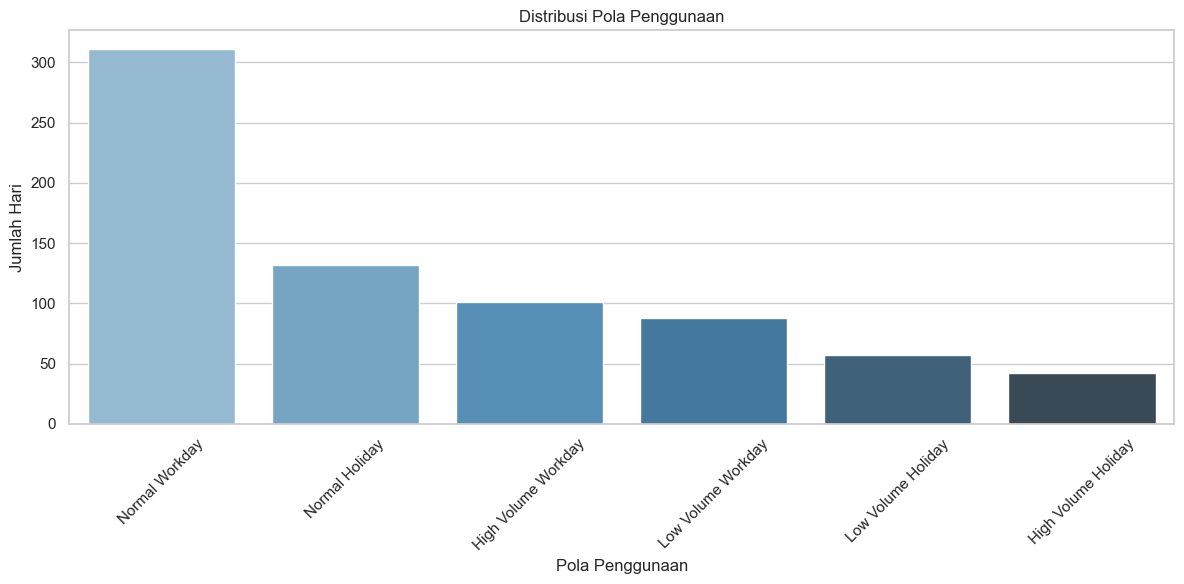

In [58]:
# Visualisasi Distribusi Pola Penggunaan
plt.figure(figsize=(12, 6))
pattern_dist = df_day_clean['usage_pattern'].value_counts().reset_index()
pattern_dist.columns = ['Pola Penggunaan', 'Jumlah Hari']
sns.barplot(data=pattern_dist, x='Pola Penggunaan', y='Jumlah Hari', palette='Blues_d')
plt.title('Distribusi Pola Penggunaan')
plt.xlabel('Pola Penggunaan')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### **Penjelasan:**

Langkah ini mengelompokkan hari-hari dalam dataset ke dalam pola penggunaan berdasarkan apakah hari tersebut hari kerja atau libur serta jumlah peminjaman hari tersebut. Kategori pola penggunaan yang dibentuk adalah:

- **High Volume Workday:** Hari kerja dengan peminjaman di atas rata-rata + standar deviasi.

- **Low Volume Workday:** Hari kerja dengan peminjaman di bawah rata-rata - standar deviasi.

- **Normal Workday:** Hari kerja dengan peminjaman dalam rentang rata-rata ± standar deviasi.

- **High Volume Holiday:** Hari libur dengan peminjaman di atas rata-rata + standar deviasi.

- **Low Volume Holiday:** Hari libur dengan peminjaman di bawah rata-rata - standar deviasi.

- **Normal Holiday:** Hari libur dengan peminjaman dalam rentang rata-rata ± standar deviasi.

Visualisasi distribusi pola penggunaan memberikan gambaran frekuensi masing-masing pola dalam dataset.


#### **3. Analisis Keterkaitan antara Kategori Pengguna dan Pola Penggunaan**


##### **3.1 Membuat Crosstab antara Kategori Pengguna dan Pola Penggunaan**

In [59]:
# Membuat crosstab antara kategori pengguna dan pola penggunaan
cross_pattern = pd.crosstab(df_day_clean['user_category'], df_day_clean['usage_pattern'])
cross_pattern

usage_pattern,High Volume Holiday,High Volume Workday,Low Volume Holiday,Low Volume Workday,Normal Holiday,Normal Workday
user_category,,,,,,
Casual Dominant,5,0,4,0,19,1
Mixed Usage,37,6,23,0,90,14
Registered Dominant,0,95,30,88,23,296



##### **3.2 Visualisasi Heatmap Hubungan antara Kategori Pengguna dan Pola Penggunaan**

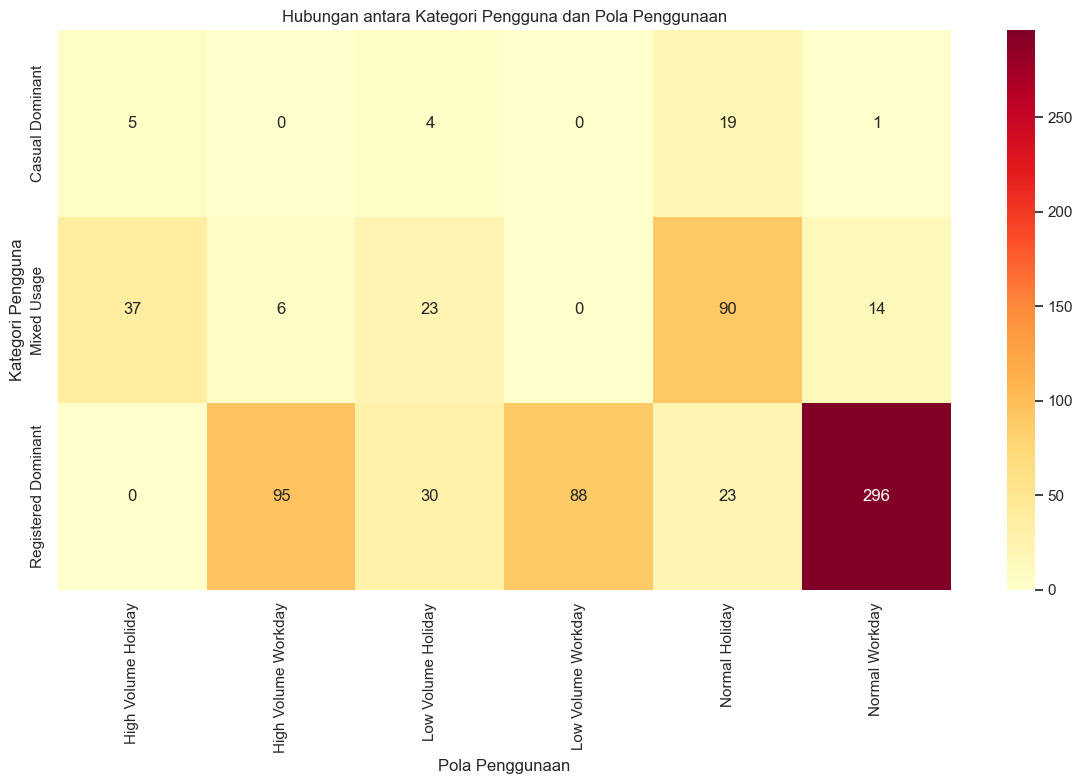

In [60]:
# Visualisasi Heatmap Hubungan antara Kategori Pengguna dan Pola Penggunaan
plt.figure(figsize=(12, 8))
sns.heatmap(cross_pattern, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Hubungan antara Kategori Pengguna dan Pola Penggunaan')
plt.xlabel('Pola Penggunaan')
plt.ylabel('Kategori Pengguna')
plt.tight_layout()
plt.show()


#### **Penjelasan:**

Analisis keterkaitan ini mengkorelasikan kategori pengguna (Registered Only, Casual Only, dll.) dengan pola penggunaan (High Volume Workday, Low Volume Holiday, dll.). Dengan heatmap, kita dapat mengidentifikasi hubungan antara tipe pengguna dengan bagaimana mereka menggunakan sepeda pada hari kerja atau libur.


#### **4. Analisis Pengaruh Kondisi Cuaca terhadap Pola Penggunaan**


##### **4.1 Membuat Crosstab antara Kondisi Cuaca dan Pola Penggunaan**

In [61]:
# Membuat crosstab antara kondisi cuaca dan pola penggunaan
weather_pattern = pd.crosstab(df_day_clean['weathersit'], df_day_clean['usage_pattern'])
weather_pattern

usage_pattern,High Volume Holiday,High Volume Workday,Low Volume Holiday,Low Volume Workday,Normal Holiday,Normal Workday
weathersit,,,,,,
Clear,37,80,35,35,84,192
Light Snow/Rain,0,0,4,12,1,4
Mist,5,21,18,41,47,115



##### **4.2 Visualisasi Heatmap Pengaruh Cuaca terhadap Pola Penggunaan Sepeda**

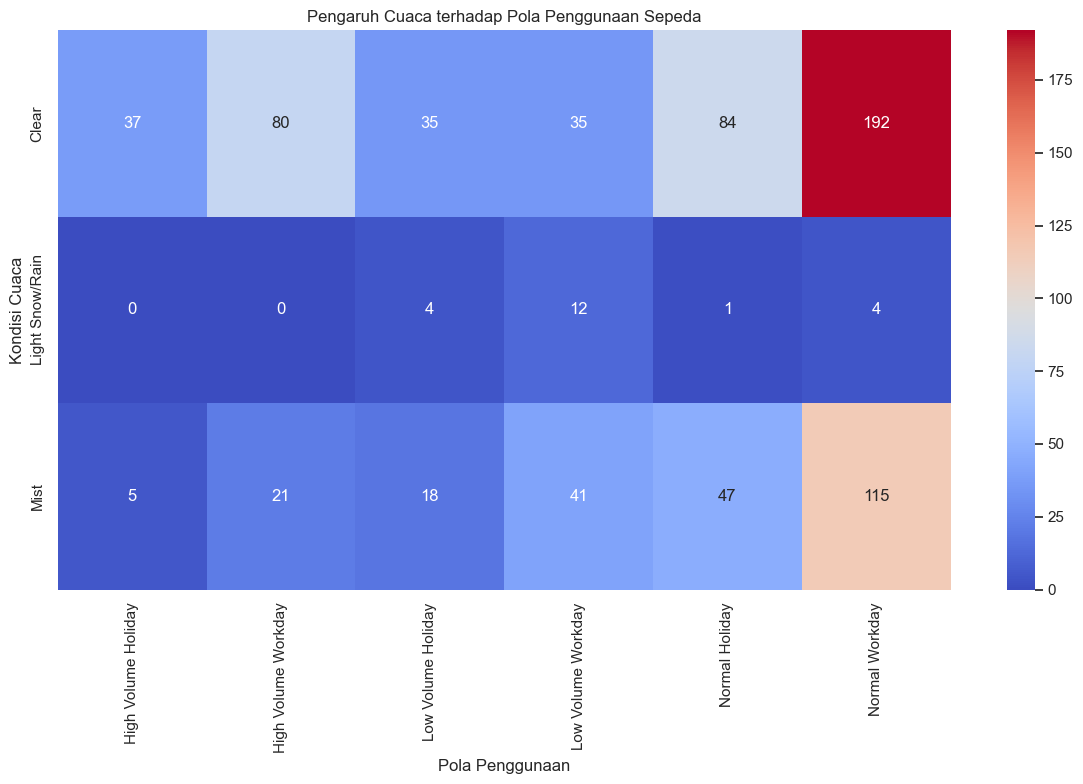

In [62]:
# Visualisasi Heatmap Pengaruh Cuaca terhadap Pola Penggunaan Sepeda
plt.figure(figsize=(12, 8))
sns.heatmap(weather_pattern, annot=True, fmt='d', cmap='coolwarm')
plt.title('Pengaruh Cuaca terhadap Pola Penggunaan Sepeda')
plt.xlabel('Pola Penggunaan')
plt.ylabel('Kondisi Cuaca')
plt.tight_layout()
plt.show()


#### **Penjelasan:**

Dengan menggunakan heatmap crosstab antara kondisi cuaca dan pola penggunaan, kita dapat melihat bagaimana berbagai kondisi cuaca mempengaruhi kategori pola penggunaan sepeda. Analisis ini membantu dalam memahami dampak kondisi eksternal terhadap perilaku pengguna.


#### **5. Statistik Deskriptif per Kategori Pengguna**

In [63]:
# Menampilkan statistik deskriptif untuk setiap kategori pengguna
df_day_clean.groupby('user_category')['cnt'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
user_category,,,,,,,,
Casual Dominant,29.0,4675.48,1832.42,754.0,3249.00,4788.0,5923.00,8294.0
Mixed Usage,170.0,4971.02,1861.62,985.0,3652.50,5003.0,6434.75,8714.0
Registered Dominant,532.0,4345.90,1944.91,22.0,2840.25,4365.0,5701.75,8173.0


## Conclusion

- **Conclusion Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu dan faktor cuaca?**

  1. **Pola Waktu & Segmentasi Pengguna:**
     * **Registered users:**
       - Peak hours jelas: pagi (08:00) dan sore (17:00-18:00).
       - Dominan di hari kerja (3,978 vs 606 casual users).
       - Pola konsisten menunjukkan penggunaan untuk komuting.
       - Berdasarkan clustering, 72.8% hari didominasi registered users.
     * **Casual users:**
       - Puncak di siang-sore hari.
       - Lebih aktif di hari libur (1,371 vs 2,959 registered).
       - Hanya 4% hari yang didominasi casual users.
       - 23.3% hari menunjukkan penggunaan campuran (mixed usage).

  2. **Pola Musiman:**
     * **Fall:** Musim tersibuk (4,441 registered, 1,202 casual).
     * **Summer:** Musim kedua tersibuk (3,886 registered, 1,106 casual).
     * **Winter & Spring:** Aktivitas lebih rendah.
     * **Rasio casual/registered** tertinggi di Summer (0.284) dan Fall (0.270).

  3. **Pengaruh Cuaca:**
     * Kedua segmen menunjukkan penurunan signifikan saat cuaca buruk.
     * Registered users lebih konsisten dalam penggunaan di berbagai kondisi cuaca.
     * Casual users lebih sensitif terhadap perubahan cuaca.
     * Cuaca cerah menghasilkan volume tinggi: 80 hari kerja dan 37 hari libur dengan volume tinggi.

- **Conclusion Pertanyaan 2: Faktor-faktor yang mempengaruhi peminjaman?**

  1. **Faktor Utama:**
     * **Jenis Hari & Pola Penggunaan:**
       - 42.5% hari adalah "Normal Workday"
       - 18.1% "Normal Holiday"
       - 13.8% "High Volume Workday"
       - Volume tinggi lebih umum pada hari kerja (13.8%) vs hari libur (5.7%)
     * **Musim:**
       - Mempengaruhi volume total peminjaman.
       - Fall dan Summer menunjukkan aktivitas tertinggi.
     * **Cuaca:**
       - Cuaca buruk (kategori 3) hampir selalu menghasilkan volume rendah.
       - Dari 17 hari dengan cuaca buruk, 16 hari menunjukkan volume rendah.

  2. **Rekomendasi Strategis:**
     * **Strategi Segmentasi:**
       - Fokus utama pada registered users (72.8% hari).
       - Program khusus untuk meningkatkan casual users di 23.3% hari mixed usage.
     * **Manajemen Armada:**
       - Alokasi berbeda untuk workday (68.3% total hari) vs holiday (31.7%).
       - Antisipasi volume tinggi di 19.5% total hari (13.8% workday + 5.7% holiday).
     * **Marketing:**
       - Promosi membership di musim-musim ramai.
       - Target konversi di hari-hari "Mixed Usage" (23.3%).
       - Program khusus untuk mengoptimalkan penggunaan di volume rendah (19.8% total hari).